In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


x_train = x_train / 255.0
x_test = x_test / 255.0


y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Регуляризація
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [5]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64,
                    validation_data=(x_test, y_test))


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 60s 62ms/step - accuracy: 0.6821 - loss: 0.8738 - val_accuracy: 0.8579 - val_loss: 0.3943
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 57s 61ms/step - accuracy: 0.8545 - loss: 0.4060 - val_accuracy: 0.8775 - val_loss: 0.3374
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 61ms/step - accuracy: 0.8793 - loss: 0.3319 - val_accuracy: 0.8931 - val_loss: 0.2993
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 60ms/step - accuracy: 0.8942 - loss: 0.2938 - val_accuracy: 0.8982 - val_loss: 0.2862
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 56s 60ms/step - accuracy: 0.9034 - loss: 0.2666 - val_accuracy: 0.9029 - val_loss: 0.2679
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 59ms/step - accuracy: 0.9125 - loss: 0.2400 - val_accuracy: 0.8998 - val_loss: 0.2737
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 85s 62ms/step - accuracy: 0.9186 - loss: 0.2255 - val_accuracy: 0.9085 - val_loss: 0.2493
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 60ms/step - accuracy: 0.9255 - loss: 0.2017 - 

In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.2%}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9103 - loss: 0.2573
Test accuracy: 91.17%


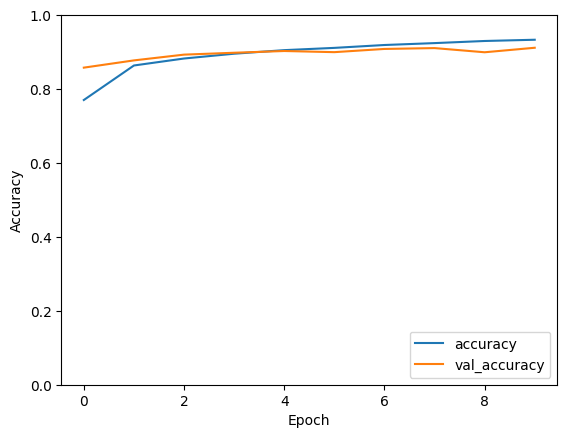

In [7]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
